In [1]:
%matplotlib inline

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [143]:
df = pd.read_csv('googleplaystore.csv',encoding='latin1')


<Figure size 432x288 with 0 Axes>

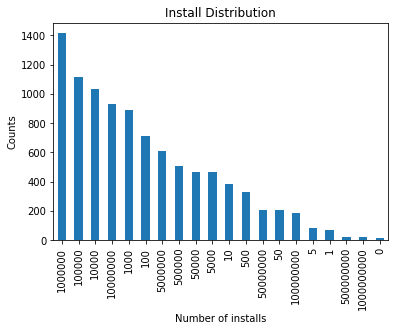

In [134]:
#Installs numbers
fig = plt.figure()
fig,ax = plt.subplots()

ax.set(xlabel='Number of installs',ylabel='Counts',title='Install Distribution')
df['Installs'].value_counts().plot(kind='bar')

fig.savefig('#installs.png')

<Figure size 432x288 with 0 Axes>

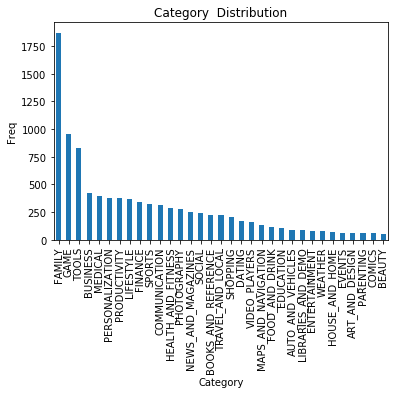

In [274]:
#Apps Category 
fig = plt.figure()
fig,ax = plt.subplots()

ax.set(xlabel='Category',ylabel='Freq',title='Category  Distribution')

freq = df['Category'].value_counts()
freq.plot(kind='bar')
fig.savefig('Category.png')

In [157]:
data = df.groupby('Category').Installs.agg('mean')
data

Category
ART_AND_DESIGN          1856362
AUTO_AND_VEHICLES        625061
BEAUTY                   513151
BOOKS_AND_REFERENCE     7504367
BUSINESS                1651944
COMICS                   803234
COMMUNICATION          34947076
DATING                   828971
EDUCATION               1734813
ENTERTAINMENT           8970379
EVENTS                   249580
FAMILY                  3203439
FINANCE                 1319851
FOOD_AND_DRINK          1891060
GAME                   14357019
HEALTH_AND_FITNESS      3951297
HOUSE_AND_HOME          1331540
LIBRARIES_AND_DEMO       630903
LIFESTYLE               1365375
MAPS_AND_NAVIGATION     3841846
MEDICAL                  121952
NEWS_AND_MAGAZINES      9327628
PARENTING                525351
PERSONALIZATION         4075783
PHOTOGRAPHY            16577037
PRODUCTIVITY           15476180
SHOPPING                6932419
SOCIAL                 22961790
SPORTS                  3964753
TOOLS                   9772957
TRAVEL_AND_LOCAL       13218662

### Game Apps Analysis < 

<Figure size 432x288 with 0 Axes>

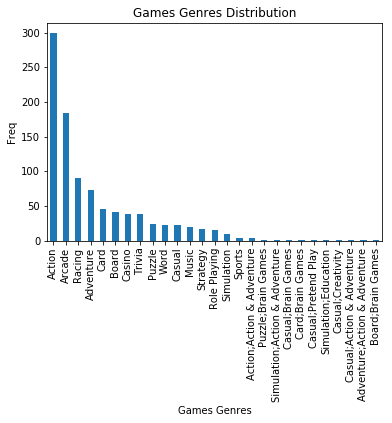

In [271]:
#Games App
data = df.loc[df['Category']=='GAME',['App','Reviews','Installs','Genres']]

fig = plt.figure()
fig,ax = plt.subplots()

ax.set(xlabel='Games Genres',ylabel='Freq',title='Games Genres Distribution')

freq = data['Genres'].value_counts()
freq.plot(kind='bar')
fig.savefig('GameGenres.png')

In [216]:
#Actions ,Arcade games are popular let's see their installs numbers
data = df.loc[(df['Category']=='GAME')&(df['Genres']=='Arcade'),['App','Installs']]
A = data.loc[data['Installs']>1000000,['App','Installs']]
R = data.loc[data['Installs']==1000000,['App','Installs']]
C = data.loc[data['Installs']<1000000,['App','Installs']]

print(data.describe())
print(A.describe())
print(R.describe())
print(C.describe())

#it's not a good idea ,  apps > 1M+ affect the mean
#Action games will be the same

           Installs
count  1.840000e+02
mean   2.040831e+07
std    7.876246e+07
min    1.000000e+00
25%    4.000000e+04
50%    1.000000e+06
75%    1.000000e+07
max    1.000000e+09
           Installs
count  8.100000e+01
mean   4.592593e+07
std    1.140726e+08
min    5.000000e+06
25%    1.000000e+07
50%    1.000000e+07
75%    5.000000e+07
max    1.000000e+09
        Installs
count       28.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count      75.000000
mean    95055.400000
std    172755.623966
min         1.000000
25%       100.000000
50%     10000.000000
75%    100000.000000
max    500000.000000


In [221]:
data = df.loc[(df['Category']=='GAME')&(df['Genres']=='Board;Brain Games'),['App','Installs']]
B = data.loc[data['Installs']>1000000,['App','Installs']]
R = data.loc[data['Installs']==1000000,['App','Installs']]
G = data.loc[data['Installs']<1000000,['App','Installs']]
print(len(data))
print(data.describe())
print(B.describe())
print(R.describe())
print(G.describe())
#there are few apps in board and brain games ,they show a good potential

1
         Installs
count         1.0
mean   50000000.0
std           NaN
min    50000000.0
25%    50000000.0
50%    50000000.0
75%    50000000.0
max    50000000.0
         Installs
count         1.0
mean   50000000.0
std           NaN
min    50000000.0
25%    50000000.0
50%    50000000.0
75%    50000000.0
max    50000000.0
       Installs
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
       Installs
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


### End of Game Apps Analysis >





### Book and Reference Analysis <

In [224]:
data = df.loc[df['Category']=='BOOKS_AND_REFERENCE',['App','Installs']]
b = data.loc[data['Installs']>1000000,['App','Installs']]
a = data.loc[data['Installs']==1000000,['App','Installs']]
r = data.loc[data['Installs']<1000000,['App','Installs']]
print(data.describe())
print(b.describe())
print(a.describe())
print(r.describe())

#seems that the 1M+ club contains reader apps and books app('Al Quran','Bible','English Dictionary').
#the books app like 'Al Quran','Bible' are few that shows good potential to enter this market.
#go find good books and turn them into apps.

           Installs
count  2.220000e+02
mean   7.504367e+06
std    6.825714e+07
min    1.000000e+00
25%    1.000000e+03
50%    1.000000e+04
75%    5.000000e+05
max    1.000000e+09
           Installs
count  3.300000e+01
mean   4.954545e+07
std    1.733059e+08
min    5.000000e+06
25%    5.000000e+06
50%    1.000000e+07
75%    1.000000e+07
max    1.000000e+09
        Installs
count       20.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count     169.000000
mean    64908.733728
std    144768.185836
min         1.000000
25%       500.000000
50%      5000.000000
75%     50000.000000
max    500000.000000


### End of Books and Reference Analysis >




### Maps and Navigation apps Analysis <

In [226]:
#Navigations apps
data = df.loc[df['Category']=='MAPS_AND_NAVIGATION',['App','Installs']]
b = data.loc[data['Installs']>1000000,['App','Installs']]
a = data.loc[data['Installs']==1000000,['App','Installs']]
r = data.loc[data['Installs']<1000000,['App','Installs']]
print(data.describe())
print(b.describe())
print(a.describe())
print(r.describe())
#There is monopoly in this category it's not a good idea to enter this market
#and Social apps too

           Installs
count  1.310000e+02
mean   3.841846e+06
std    1.371898e+07
min    1.000000e+01
25%    5.000000e+03
50%    1.000000e+05
75%    1.000000e+06
max    1.000000e+08
           Installs
count  2.900000e+01
mean   1.637931e+07
std    2.577016e+07
min    5.000000e+06
25%    5.000000e+06
50%    5.000000e+06
75%    1.000000e+07
max    1.000000e+08
        Installs
count       25.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count      77.000000
mean    42621.948052
std     99641.465014
min        10.000000
25%      1000.000000
50%      5000.000000
75%     50000.000000
max    500000.000000


### End of Maps and Navigations App Analysis >



### Medical Apps Analysis <

In [235]:
#medical apps #19
data = df.loc[df['Category']=='MEDICAL',['App','Installs']]
b = data.loc[data['Installs']>1000000,['App','Installs']]
a = data.loc[data['Installs']==1000000,['App','Installs']]
r = data.loc[data['Installs']<1000000,['App','Installs']]
print(data.describe())
print(b.describe())
print(a.describe())
print(r.describe())

# you can design apps for ('Blood pressure','period','Blood sugar')
# and better is you design apps for medical learning there only one app (Anatomy Learning - 3D Atlas)
#or malaria diagnosis app use some deep learning
#or pharmacy apps ('Medication dictunary with -pic and descriptions-')

           Installs
count  3.960000e+02
mean   1.219522e+05
std    6.435796e+05
min    0.000000e+00
25%    1.000000e+02
50%    1.000000e+03
75%    1.000000e+04
max    1.000000e+07
           Installs
count  3.000000e+00
mean   6.666667e+06
std    2.886751e+06
min    5.000000e+06
25%    5.000000e+06
50%    5.000000e+06
75%    7.500000e+06
max    1.000000e+07
        Installs
count       16.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count     377.000000
mean    32607.631300
std     90734.634611
min         0.000000
25%       100.000000
50%      1000.000000
75%     10000.000000
max    500000.000000


### End of Medical App Analysis >



### Health and fitness apps Analysis <

In [262]:
data = df.loc[df['Category']=='HEALTH_AND_FITNESS',['App','Installs']]
h = data.loc[data['Installs']>1000000,['App','Installs']]
a = data.loc[data['Installs']==1000000,['App','Installs']]
f = data.loc[data['Installs']<1000000,['App','Installs']]
print(data.describe())
print(h.describe())
print(a.describe())
print(f.describe())

data[data['App'].str.match('Yoga')]
#design APP In health care and fitness seems good idea
#there are just two apps on Yoga with a pretty good installs number ,you can design yoga app

           Installs
count  2.870000e+02
mean   3.951298e+06
std    3.024564e+07
min    1.000000e+00
25%    1.000000e+03
50%    1.000000e+05
75%    1.000000e+06
max    5.000000e+08
           Installs
count  5.500000e+01
mean   1.927273e+07
std    6.744283e+07
min    5.000000e+06
25%    5.000000e+06
50%    1.000000e+07
75%    1.000000e+07
max    5.000000e+08
        Installs
count       56.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count     176.000000
mean   102400.636364
std    177302.506813
min         1.000000
25%       100.000000
50%     10000.000000
75%    100000.000000
max    500000.000000


,App,Installs
9244,Yoga - Track Yoga,500000
9245,Yoga Studio: Mind & Body,100000


### End of Health and Fitness App >




### Education Apps Analysis <

In [268]:
data = df.loc[df['Category']=='EDUCATION',['App','Installs']]
e = data.loc[data['Installs']>1000000,['App','Installs']]
c = data.loc[data['Installs']==1000000,['App','Installs']]
d = data.loc[data['Installs']<1000000,['App','Installs']]
print(data.describe())
print(e.describe())
print(c.describe())
print(d.describe())


#there are alot of english apps , you can do other language ,Arabic for examples it's beautifull and rich language

           Installs
count  1.020000e+02
mean   1.734814e+06
std    2.697631e+06
min    1.000000e+03
25%    1.000000e+05
50%    1.000000e+06
75%    1.000000e+06
max    1.000000e+07
           Installs
count  1.900000e+01
mean   6.842105e+06
std    2.477973e+06
min    5.000000e+06
25%    5.000000e+06
50%    5.000000e+06
75%    1.000000e+07
max    1.000000e+07
        Installs
count       39.0
mean   1000000.0
std          0.0
min    1000000.0
25%    1000000.0
50%    1000000.0
75%    1000000.0
max    1000000.0
            Installs
count      44.000000
mean   180704.545455
std    189167.033308
min      1000.000000
25%     50000.000000
50%    100000.000000
75%    200000.000000
max    500000.000000


### End of Education Apps >

<Figure size 432x288 with 0 Axes>

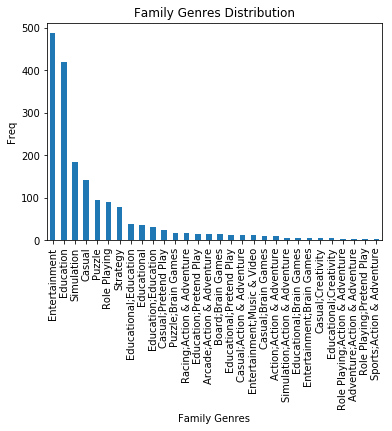

In [273]:
#Family Apps top 30
data = df.loc[df['Category']=='FAMILY',['App','Reviews','Installs','Genres']]

fig = plt.figure()
fig,ax = plt.subplots()

ax.set(xlabel='Family Genres',ylabel='Freq',title='Family Genres Distribution')

freq = data['Genres'].value_counts()
freq[0:30].plot(kind='bar')
fig.savefig('FamilyGenres.png')

<Figure size 432x288 with 0 Axes>

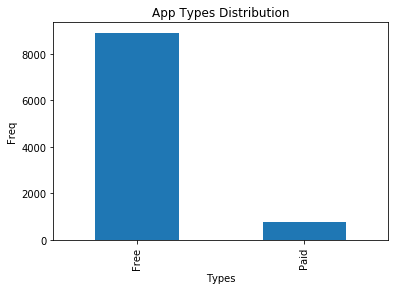

In [48]:
#apps types
fig = plt.figure()
fig,ax = plt.subplots()

ax.set(xlabel='Types',ylabel='Freq',title='App Types Distribution')
freq = df['Type'].value_counts()
freq.plot(kind='bar')
fig.savefig('AppTypes.png')

